In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.333333   
2           3  2017-08-14 14:15:00      0.000000   0.250000  0.083333   
3           4  2017-08-14 14:30:00      0.000000   0.250000  2.083333   
4           5  2017-08-14 14:45:00      0.333333   0.208333  1.680556   
5           6  2017-08-14 15:00:00      0.333333   0.208333  1.680556   
6           7  2017-08-14 15:15:00      0.333333   0.208333  1.680556   
7           8  2017-08-14 15:30:00      0.333333   0.302083  1.920139   
8           9  2017-08-14 15:45:00      0.166667   0.651042  3.460069   
9          10  2017-08-14 16:00:00      0.166667   0.651042  3.460069   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000     0.000000          0.0     0.000000         0  
1  0.333333     0.333333          0.0     0.000000         3  
2  0.58

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5174870466321243
0.5284974093264249
F1,score 0.5967854647099929
G-score: 0.501727115716753
Window: 4
[[154 392]
 [185 427]]
Vol pos 0.3403881333415332
Vol neg 0.32294134807496044


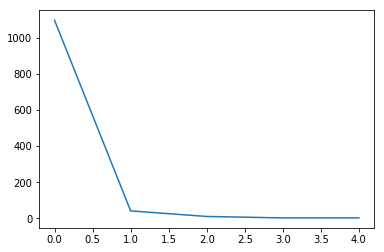

Percentage of gain: 0.009869039406026424
Total gain: 11.4283476321786
000000000000000000000000000000000000000000000000
Percentile:  0
[[148 377]
 [170 403]]
0.5018214936247724
Percentile:  1
[[ 5 13]
 [ 9 14]]
0.4634146341463415
Percentile:  2
[[1 2]
 [2 5]]
0.6
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5246926892387319
0.5496117342536669
F1,score 0.47038327526132406
G-score: 0.47540983606557374
Window: 4
[[281 241]
 [367 270]]
Vol pos 0.37242899157343173
Vol neg 0.3401572796971015


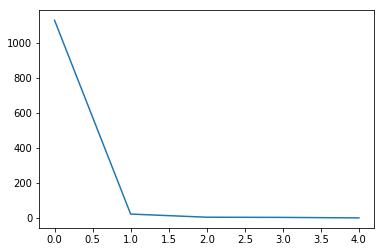

Percentage of gain: -0.001386757289798824
Total gain: -1.607251698876837
000000000000000000000000000000000000000000000000
Percentile:  0
[[270 234]
 [360 264]]
0.4734042553191489
Percentile:  1
[[11  5]
 [ 4  2]]
0.5909090909090909
Percentile:  2
[[0 2]
 [2 0]]
0.0
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4725598526703499
0.588495575221239
F1,score 0.6960167714884696
G-score: 0.5722713864306784
Window: 4
[[ 56 223]
 [ 67 332]]
Vol pos 0.3169357886620974
Vol neg 0.2270389779141341


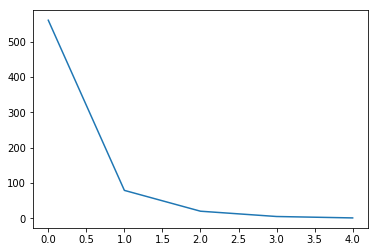

Percentage of gain: 0.08426221593775059
Total gain: 57.1297824057949
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 48 197]
 [ 56 260]]
0.5490196078431373
Percentile:  1
[[ 4 22]
 [ 8 45]]
0.620253164556962
Percentile:  2
[[ 1  3]
 [ 0 16]]
0.85
Percentile:  3
[[2 1]
 [0 2]]
0.8
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5205094991364422
0.5250431778929189
F1,score 0.5838103025347506
G-score: 0.5604490500863558
Window: 4
[[292 258]
 [251 357]]
Vol pos 0.41832429297677576
Vol neg 0.35273427432504273


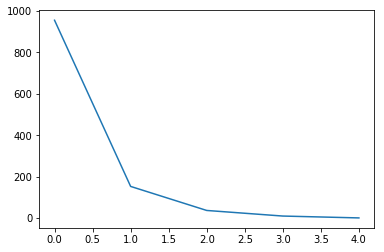

Percentage of gain: 0.07940476728020787
Total gain: 91.95072051048072
000000000000000000000000000000000000000000000000
Percentile:  0
[[229 231]
 [206 289]]
0.5424083769633508
Percentile:  1
[[52 22]
 [31 48]]
0.6535947712418301
Percentile:  2
[[ 7  2]
 [12 16]]
0.6216216216216216
Percentile:  3
[[3 2]
 [2 3]]
0.6
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5274179620034543
0.5375972342264477
F1,score 0.33264462809917356
G-score: 0.44165946413137425
Window: 4
[[350 185]
 [461 161]]
Vol pos 0.3630681422667164
Vol neg 0.3695442097039154


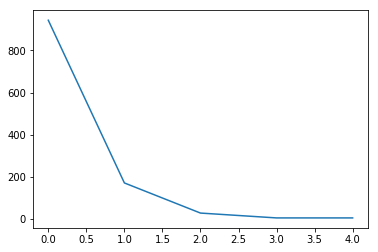

Percentage of gain: -0.045979030916540396
Total gain: -53.19773877043724
000000000000000000000000000000000000000000000000
Percentile:  0
[[298 140]
 [383 122]]
0.44538706256627786
Percentile:  1
[[39 38]
 [61 33]]
0.42105263157894735
Percentile:  2
[[ 6  6]
 [10  6]]
0.42857142857142855
Percentile:  3
[[4 0]
 [1 0]]
0.8
Percentile:  4
[[2 1]
 [2 0]]
0.4
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5161707632600259
0.5366695427092321
F1,score 0.6715328467153284
G-score: 0.5340811044003452
Window: 4
[[ 67 470]
 [ 70 552]]
Vol pos 0.450181974749782
Vol neg 0.38678120931090854


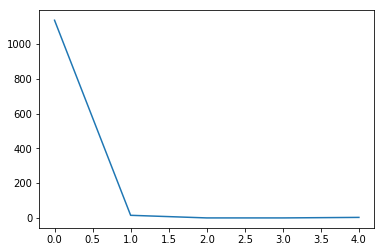

Percentage of gain: 0.0602250123746544
Total gain: 69.80078934222445
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66 464]
 [ 66 540]]
0.5334507042253521
Percentile:  1
[[1 6]
 [2 6]]
0.4666666666666667
Percentile:  2
Percentile:  3
Percentile:  4
[[0 0]
 [1 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5316946959896507
0.5220017256255393
F1,score 0.3996138996138996
G-score: 0.4633304572907679
Window: 4
[[330 224]
 [398 207]]
Vol pos 0.5162503045369838
Vol neg 0.49451398395787527


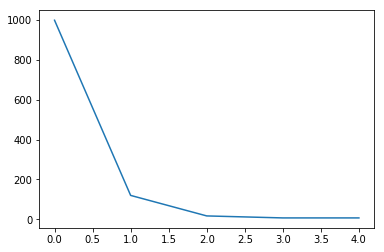

Percentage of gain: -0.02619610395637454
Total gain: -30.36128448543809
000000000000000000000000000000000000000000000000
Percentile:  0
[[279 194]
 [342 184]]
0.46346346346346345
Percentile:  1
[[40 23]
 [40 17]]
0.475
Percentile:  2
[[4 4]
 [4 5]]
0.5294117647058824
Percentile:  3
[[3 3]
 [0 1]]
0.5714285714285714
Percentile:  4
[[3 0]
 [4 0]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5432661027976577
0.5329861111111112
F1,score 0.5198983911939035
G-score: 0.5078125
Window: 4
[[278 260]
 [307 307]]
Vol pos 0.39777124312681034
Vol neg 0.37859188184921305


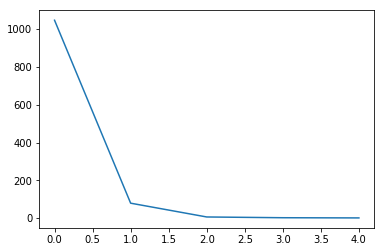

Percentage of gain: 0.01565501755267383
Total gain: 18.034580220680255
000000000000000000000000000000000000000000000000
Percentile:  0
[[251 240]
 [281 275]]
0.5023877745940784
Percentile:  1
[[27 13]
 [18 21]]
0.6075949367088608
Percentile:  2
[[0 3]
 [2 1]]
0.16666666666666666
Percentile:  3
[[0 2]
 [0 0]]
0.0
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49773560491697216
0.5090595340811044
F1,score 0.3837784371909001
G-score: 0.4624676445211389
Window: 4
[[342 227]
 [396 194]]
Vol pos 0.5183094240287013
Vol neg 0.4855889787640616


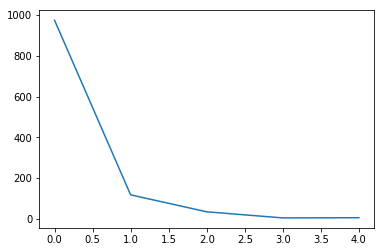

Percentage of gain: -0.021318449085959024
Total gain: -24.70808249062651
000000000000000000000000000000000000000000000000
Percentile:  0
[[290 195]
 [341 148]]
0.44969199178644764
Percentile:  1
[[39 21]
 [32 26]]
0.5508474576271186
Percentile:  2
[[12  9]
 [ 4 10]]
0.6285714285714286
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[1 0]
 [2 3]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5204829667960328
0.546160483175151
F1,score 0.5842868039664378
G-score: 0.5297670405522001
Window: 4
[[231 295]
 [250 383]]
Vol pos 0.5520221986042416
Vol neg 0.4837860125755293


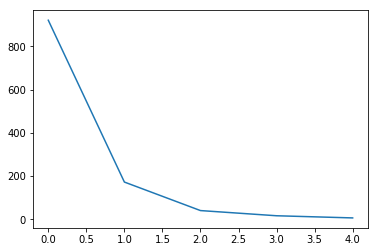

Percentage of gain: 0.06495103804084636
Total gain: 75.27825308934092
000000000000000000000000000000000000000000000000
Percentile:  0
[[183 241]
 [203 294]]
0.5179153094462541
Percentile:  1
[[31 40]
 [38 63]]
0.5465116279069767
Percentile:  2
[[10  8]
 [ 7 15]]
0.625
Percentile:  3
[[7 4]
 [0 5]]
0.75
Percentile:  4
[[0 1]
 [0 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.516282078930343
0.542709232096635
F1,score 0.6366013071895424
G-score: 0.5202761000862812
Window: 4
[[116 414]
 [142 487]]
Vol pos 0.5546730718546031
Vol neg 0.5295479347997426


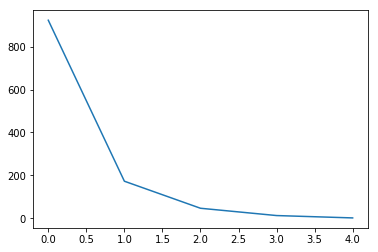

Percentage of gain: 0.03454634217400242
Total gain: 40.039210579668804
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 95 345]
 [105 377]]
0.5119305856832972
Percentile:  1
[[19 44]
 [26 84]]
0.5953757225433526
Percentile:  2
[[ 1 16]
 [10 20]]
0.44680851063829785
Percentile:  3
[[1 7]
 [0 5]]
0.46153846153846156
Percentile:  4
[[0 1]
 [0 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... BKNG
1.1369985598232721
0.000939946799010321
Diff in tren train and test
0.5096887844979449
0.548235294117647
F1,score 0.6333973128598848
G-score: 0.5505882352941176
Window: 4
[[ 69 123]
 [ 68 165]]
Vol pos 0.2675457581441844
Vol neg 0.24162083912296892


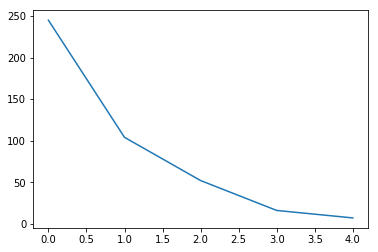

Percentage of gain: 0.038720299137063735
Total gain: 16.45612713325209
000000000000000000000000000000000000000000000000
Percentile:  0
[[41 72]
 [43 89]]
0.5306122448979592
Percentile:  1
[[14 29]
 [20 41]]
0.5288461538461539
Percentile:  2
[[11 13]
 [ 5 22]]
0.6470588235294118
Percentile:  3
[[ 3  3]
 [ 0 10]]
0.8125
Percentile:  4
[[0 4]
 [0 3]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5433326129241409
0.5501730103806228
F1,score 0.5498821681068342
G-score: 0.504325259515571
Window: 4
[[233 287]
 [286 350]]
Vol pos 0.4773212151530278
Vol neg 0.38323390399552526


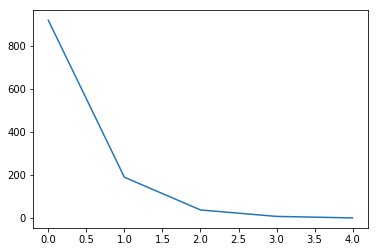

Percentage of gain: 0.05076577979652182
Total gain: 58.685241444779216
000000000000000000000000000000000000000000000000
Percentile:  0
[[163 253]
 [233 269]]
0.47058823529411764
Percentile:  1
[[54 30]
 [36 69]]
0.6507936507936508
Percentile:  2
[[11  3]
 [15  8]]
0.5135135135135135
Percentile:  3
[[4 1]
 [1 1]]
0.7142857142857143
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5062988705473501
0.529105125977411
F1,score 0.407258064516129
G-score: 0.4891398783666377
Window: 4
[[361 181]
 [407 202]]
Vol pos 0.3677278495991246
Vol neg 0.4699034348540482


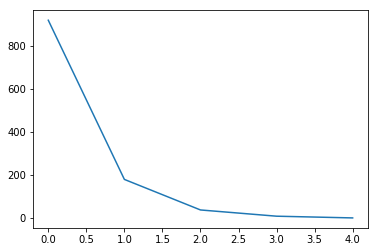

Percentage of gain: -0.060184570260532734
Total gain: -69.27244036987318
000000000000000000000000000000000000000000000000
Percentile:  0
[[305 139]
 [311 165]]
0.5108695652173914
Percentile:  1
[[49 24]
 [75 32]]
0.45
Percentile:  2
[[ 6 14]
 [14  4]]
0.2631578947368421
Percentile:  3
[[1 2]
 [6 0]]
0.1111111111111111
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5515530629853321
0.542709232096635
F1,score 0.13617021276595745
G-score: 0.4745470232959448
Window: 4
[[502  28]
 [581  48]]
Vol pos 0.39399767159089133
Vol neg 0.43920548611059923


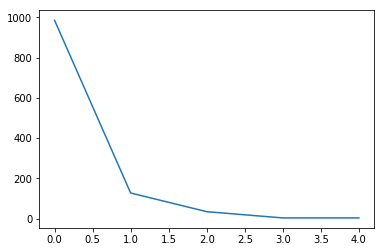

Percentage of gain: -0.043811407822575255
Total gain: -50.77742166636472
000000000000000000000000000000000000000000000000
Percentile:  0
[[435  22]
 [483  46]]
0.48782961460446245
Percentile:  1
[[49  3]
 [74  1]]
0.3937007874015748
Percentile:  2
[[18  3]
 [13  0]]
0.5294117647058824
Percentile:  3
[[0 0]
 [3 0]]
0.0
Percentile:  4
[[0 0]
 [3 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5185185185185185
0.5355285961871751
F1,score 0.6501340482573726
G-score: 0.5476603119584056
Window: 4
[[147 389]
 [133 485]]
Vol pos 0.43860809601634193
Vol neg 0.45298500914871187


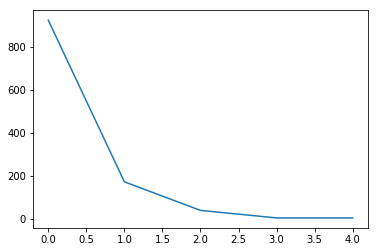

Percentage of gain: 0.035305148965944985
Total gain: 40.74214190670051
000000000000000000000000000000000000000000000000
Percentile:  0
[[115 324]
 [104 382]]
0.5372972972972972
Percentile:  1
[[30 44]
 [17 82]]
0.6473988439306358
Percentile:  2
[[ 2 13]
 [ 8 17]]
0.475
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[0 5]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.533923941227312
0.5324114088159032
F1,score 0.5028949545078577
G-score: 0.48055315471045806
Window: 4
[[252 289]
 [312 304]]
Vol pos 0.4822705048134438
Vol neg 0.5255567956484225


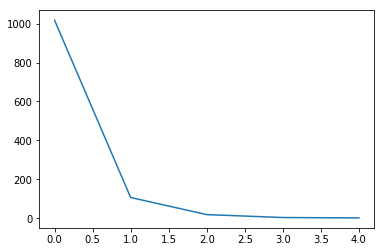

Percentage of gain: -0.041242207008147944
Total gain: -47.71723350842717
000000000000000000000000000000000000000000000000
Percentile:  0
[[228 244]
 [280 265]]
0.48475909537856443
Percentile:  1
[[22 33]
 [22 30]]
0.48598130841121495
Percentile:  2
[[2 8]
 [5 4]]
0.3157894736842105
Percentile:  3
[[0 1]
 [2 1]]
0.25
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5017301038062284
0.5242214532871973
F1,score 0.5541195476575121
G-score: 0.5224913494809689
Window: 4
[[261 289]
 [263 343]]
Vol pos 0.3839835954830913
Vol neg 0.4384530758519199


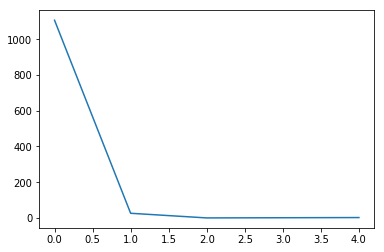

Percentage of gain: -0.008737029583453843
Total gain: -10.100006198472641
000000000000000000000000000000000000000000000000
Percentile:  0
[[253 283]
 [244 327]]
0.5239385727190605
Percentile:  1
[[ 8  2]
 [11  5]]
0.5
Percentile:  2
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.52858380251191
0.5398613518197574
F1,score 0.33444816053511706
G-score: 0.4826689774696707
Window: 4
[[407 124]
 [473 150]]
Vol pos 0.29502627316902497
Vol neg 0.30559418101033825


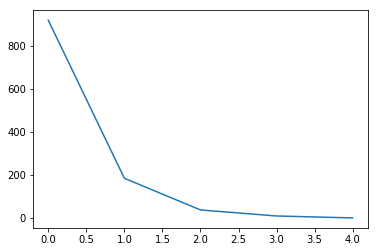

Percentage of gain: -0.015693320544215794
Total gain: -18.110091908025026
000000000000000000000000000000000000000000000000
Percentile:  0
[[325 107]
 [364 122]]
0.4869281045751634
Percentile:  1
[[68 14]
 [80 22]]
0.4891304347826087
Percentile:  2
[[10  2]
 [20  5]]
0.40540540540540543
Percentile:  3
[[4 1]
 [4 0]]
0.4444444444444444
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.5101380500431406
0.5254529767040552
F1,score 0.49300699300699297
G-score: 0.4995685936151855
Window: 4
[[297 253]
 [327 282]]
Vol pos 0.4383125846281834
Vol neg 0.46476010948677643


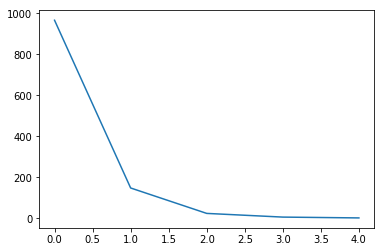

Percentage of gain: -0.01361335375548934
Total gain: -15.777877002612142
000000000000000000000000000000000000000000000000
Percentile:  0
[[259 210]
 [262 235]]
0.5113871635610766
Percentile:  1
[[32 41]
 [46 29]]
0.41216216216216217
Percentile:  2
[[ 6  2]
 [11  5]]
0.4583333333333333
Percentile:  3
[[0 0]
 [3 3]]
0.5
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  7.895788308297344


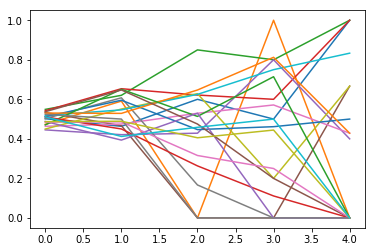

In [3]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg ,class_weight = {0:p ,1:1 })
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

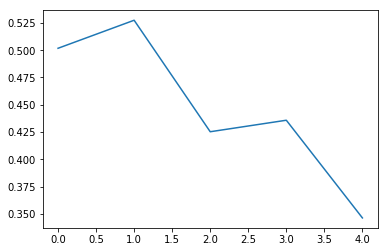

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5259050509429872
0.5602775368603643
F1,score 0.6490416391275611
G-score: 0.5394622723330442
Window: 28
[[131 376]
 [155 491]]
Vol pos 0.9303318674831014
Vol neg 1.0274415766314298


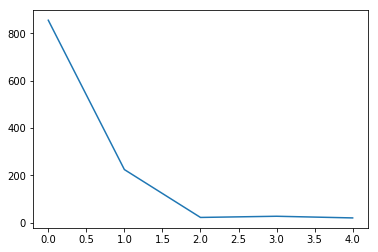

Percentage of gain: 0.02870333424388538
Total gain: 33.094944383199845
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 96 307]
 [ 90 361]]
0.5351288056206089
Percentile:  1
[[32 67]
 [32 94]]
0.56
Percentile:  2
[[ 2  2]
 [ 7 12]]
0.6086956521739131
Percentile:  3
[[ 0  0]
 [10 18]]
0.6428571428571429
Percentile:  4
[[ 0  0]
 [15  6]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5682113469034213
0.6377816291161178
F1,score 0.24358974358974358
G-score: 0.38648180242634317
Window: 28
[[332  86]
 [622 114]]
Vol pos 0.9269367696355693
Vol neg 1.0983131387183456


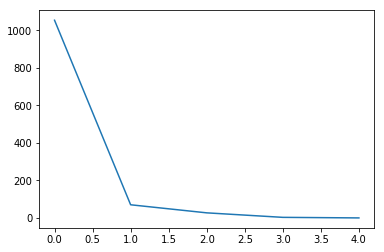

Percentage of gain: -0.3155909037739383
Total gain: -364.19190295512476
000000000000000000000000000000000000000000000000
Percentile:  0
[[317  67]
 [566 102]]
0.3982889733840304
Percentile:  1
[[13 13]
 [34 10]]
0.32857142857142857
Percentile:  2
[[ 2  5]
 [20  0]]
0.07407407407407407
Percentile:  3
[[0 0]
 [2 1]]
0.3333333333333333
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44881305637982194
0.75037147102526
F1,score 0.6026315789473684
G-score: 0.5512630014858841
Window: 28
[[142  26]
 [276 229]]
Vol pos 0.7443771757127925
Vol neg 0.6707213239933065


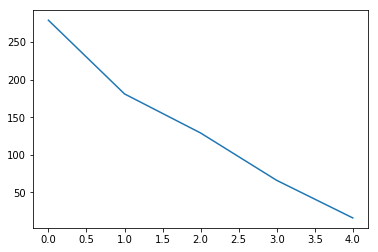

Percentage of gain: 0.10937012235284911
Total gain: 73.60609234346745
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84  12]
 [113  70]]
0.5519713261648745
Percentile:  1
[[23  9]
 [85 64]]
0.48066298342541436
Percentile:  2
[[13  5]
 [45 66]]
0.6124031007751938
Percentile:  3
[[14  0]
 [29 23]]
0.5606060606060606
Percentile:  4
[[8 0]
 [3 5]]
0.8125
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5547366139171905
0.562012142237641
F1,score 0.40812182741116754
G-score: 0.4943625325238508
Window: 28
[[369 136]
 [447 201]]
Vol pos 1.2170155848698412
Vol neg 1.2013432192392377


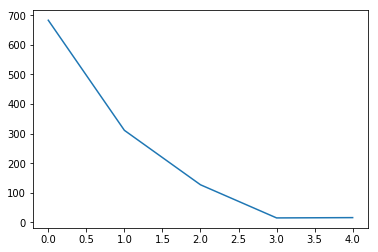

Percentage of gain: -0.005797236288522202
Total gain: -6.684213440666099
000000000000000000000000000000000000000000000000
Percentile:  0
[[242  89]
 [245 106]]
0.5102639296187683
Percentile:  1
[[ 86  39]
 [121  66]]
0.48717948717948717
Percentile:  2
[[17  6]
 [77 26]]
0.3412698412698413
Percentile:  3
[[6 2]
 [4 3]]
0.6
Percentile:  4
[[16]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.5552905464006939
0.5897658282740676
F1,score 0.6683107274969174
G-score: 0.5333911535125759
Window: 28
[[ 73 400]
 [138 542]]
Vol pos 0.8581386769304149
Vol neg 0.8264614966890464


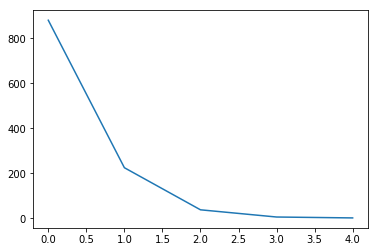

Percentage of gain: 0.07208933312532366
Total gain: 83.11900109349818
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55 307]
 [114 404]]
0.5215909090909091
Percentile:  1
[[ 17  76]
 [ 15 117]]
0.5955555555555555
Percentile:  2
[[ 1 10]
 [ 7 20]]
0.5526315789473685
Percentile:  3
[[0 5]
 [1 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5323663130547738
0.58578856152513
F1,score 0.5673534072900159
G-score: 0.5268630849220104
Window: 28
[[250 228]
 [318 358]]
Vol pos 1.2602770539808859
Vol neg 1.3317313854068311


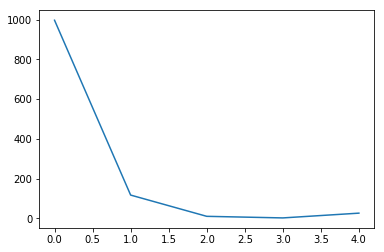

Percentage of gain: 0.033902177112867284
Total gain: 39.12311238824884
000000000000000000000000000000000000000000000000
Percentile:  0
[[219 224]
 [258 296]]
0.5165496489468405
Percentile:  1
[[22  3]
 [39 53]]
0.6410256410256411
Percentile:  2
[[9 1]
 [0 0]]
0.9
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[ 0  0]
 [19  7]]
0.2692307692307692
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5555315003247456
0.5433275563258232
F1,score 0.4075924075924076
G-score: 0.4861351819757366
Window: 28
[[357 170]
 [423 204]]
Vol pos 1.2520031405173486
Vol neg 1.1880500586836165


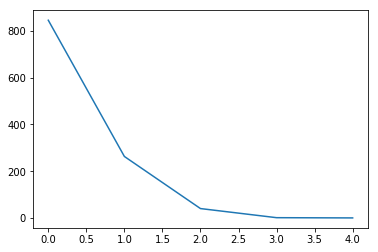

Percentage of gain: -0.001854352659577169
Total gain: -2.139922969152053
000000000000000000000000000000000000000000000000
Percentile:  0
[[271 106]
 [339 130]]
0.4739952718676123
Percentile:  1
[[78 37]
 [81 67]]
0.5513307984790875
Percentile:  2
[[ 7 27]
 [ 1  5]]
0.3
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5903745644599303
0.5213600697471665
F1,score 0.5769528228924979
G-score: 0.5231037489102005
Window: 28
[[227 322]
 [225 373]]
Vol pos 0.9422523195328399
Vol neg 0.9416826145769243


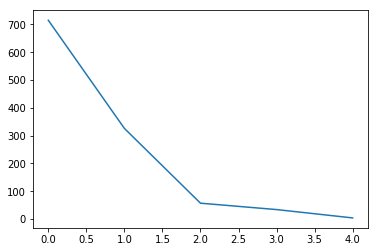

Percentage of gain: 0.04381081215878502
Total gain: 50.25100154612642
000000000000000000000000000000000000000000000000
Percentile:  0
[[121 202]
 [135 257]]
0.5286713286713287
Percentile:  1
[[78 92]
 [68 88]]
0.50920245398773
Percentile:  2
[[11 16]
 [ 8 22]]
0.5789473684210527
Percentile:  3
[[14 10]
 [10  0]]
0.4117647058823529
Percentile:  4
[[2 2]
 [0 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4686011260285838
0.5051993067590987
F1,score 0.20793433652530782
G-score: 0.4982668977469671
Window: 28
[[499  72]
 [507  76]]
Vol pos 1.4872562252135593
Vol neg 1.4179137567197817


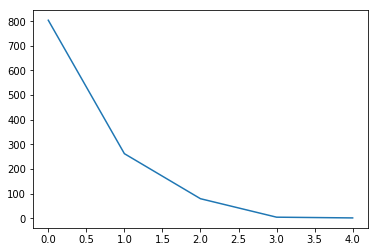

Percentage of gain: 0.02963627760575641
Total gain: 34.2002643570429
000000000000000000000000000000000000000000000000
Percentile:  0
[[334  57]
 [362  51]]
0.47885572139303484
Percentile:  1
[[126  14]
 [ 99  23]]
0.5687022900763359
Percentile:  2
[[37  1]
 [40  1]]
0.4810126582278481
Percentile:  3
[[2 0]
 [2 0]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5743667460489283
0.5805892547660312
F1,score 0.3036529680365297
G-score: 0.4714038128249567
Window: 28
[[411  73]
 [537 133]]
Vol pos 1.4750674470476592
Vol neg 1.4031112285382963


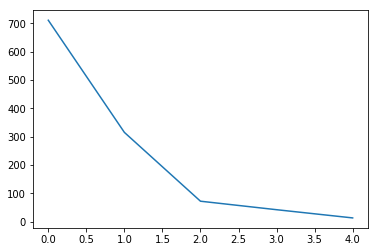

Percentage of gain: -0.046326826875592836
Total gain: -53.461158214434136
000000000000000000000000000000000000000000000000
Percentile:  0
[[264  53]
 [325  70]]
0.4691011235955056
Percentile:  1
[[113   8]
 [154  38]]
0.48242811501597443
Percentile:  2
[[15  7]
 [44  7]]
0.3013698630136986
Percentile:  3
[[18  3]
 [12  8]]
0.6341463414634146
Percentile:  4
[[1 2]
 [1 9]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.56691208315288
0.610051993067591
F1,score 0.6304801670146136
G-score: 0.5398613518197574
Window: 28
[[170 280]
 [251 453]]
Vol pos 1.5626640148470377
Vol neg 1.6195418706228335


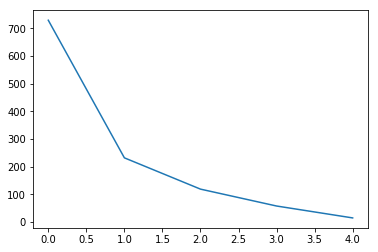

Percentage of gain: 0.09840810047571912
Total gain: 113.56294794897985
000000000000000000000000000000000000000000000000
Percentile:  0
[[137 213]
 [127 251]]
0.532967032967033
Percentile:  1
[[ 21  42]
 [ 57 112]]
0.5732758620689655
Percentile:  2
[[ 9  6]
 [38 66]]
0.6302521008403361
Percentile:  3
[[ 3  8]
 [25 22]]
0.43103448275862066
Percentile:  4
[[ 0 10]
 [ 4  1]]
0.06666666666666667
000000000000000000000000000000000000000000000000
Working on... BKNG
2.5815320081626525
0.0014318988888343074
Diff in tren train and test
0.5552256532066508
0.6166666666666667
F1,score 0.4242424242424243
G-score: 0.45714285714285713
Window: 28
[[108  53]
 [175  84]]
Vol pos 0.5167166612514112
Vol neg 0.5817564007924971


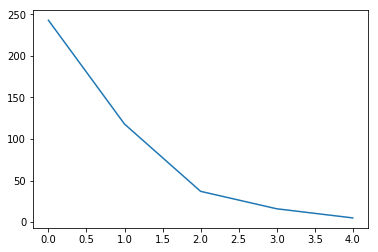

Percentage of gain: -0.07959728671528186
Total gain: -33.430860420418384
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67  26]
 [116  33]]
0.4132231404958678
Percentile:  1
[[34 12]
 [30 42]]
0.6440677966101694
Percentile:  2
[[ 6  2]
 [20  9]]
0.40540540540540543
Percentile:  3
[[0 9]
 [7 0]]
0.0
Percentile:  4
[[0 4]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5740017361111112
0.6611642050390965
F1,score 0.6085043988269795
G-score: 0.5360556038227628
Window: 28
[[202 188]
 [346 415]]
Vol pos 1.1046902945932813
Vol neg 1.1308312050858602


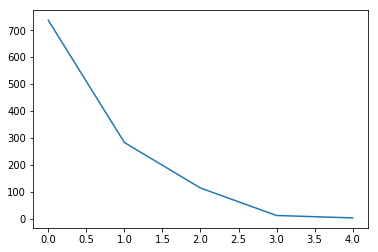

Percentage of gain: 0.06753262228341025
Total gain: 77.73004824820521
000000000000000000000000000000000000000000000000
Percentile:  0
[[125 104]
 [251 257]]
0.5183175033921302
Percentile:  1
[[ 62  42]
 [ 66 113]]
0.6183745583038869
Percentile:  2
[[15 30]
 [28 41]]
0.49122807017543857
Percentile:  3
[[0 8]
 [0 4]]
0.3333333333333333
Percentile:  4
[[0 3]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5079607415485278
0.6003490401396161
F1,score 0.4816753926701571
G-score: 0.4816753926701571
Window: 28
[[276 182]
 [412 276]]
Vol pos 1.0454969764118058
Vol neg 1.0386199656816986


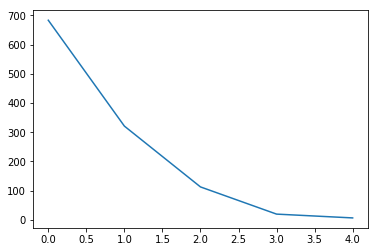

Percentage of gain: -0.03475211922828287
Total gain: -39.82592863561217
000000000000000000000000000000000000000000000000
Percentile:  0
[[167 116]
 [226 174]]
0.4992679355783309
Percentile:  1
[[ 59  46]
 [139  77]]
0.4236760124610592
Percentile:  2
[[33 10]
 [45 25]]
0.5132743362831859
Percentile:  3
[[10  9]
 [ 1  0]]
0.5
Percentile:  4
[[6 1]
 [0 0]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6268139484513754
0.5901213171577123
F1,score 0.6025903203817314
G-score: 0.4948006932409012
Window: 28
[[129 344]
 [239 442]]
Vol pos 0.9993204828982161
Vol neg 0.8982132891728875


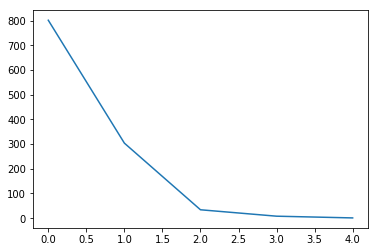

Percentage of gain: 0.04068773669591678
Total gain: 46.95364814708796
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 269]
 [147 279]]
0.48129675810473815
Percentile:  1
[[ 22  74]
 [ 85 123]]
0.4769736842105263
Percentile:  2
[[ 0  1]
 [ 6 27]]
0.7941176470588235
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48368856024358414
0.6127067014795474
F1,score 0.3798165137614678
G-score: 0.4116623150565709
Window: 28
[[266 179]
 [497 207]]
Vol pos 1.1608692638231235
Vol neg 1.2719372621602514


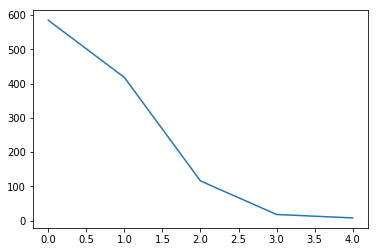

Percentage of gain: -0.27044249558920147
Total gain: -310.7384274319925
000000000000000000000000000000000000000000000000
Percentile:  0
[[115  82]
 [249 139]]
0.4341880341880342
Percentile:  1
[[111  83]
 [168  56]]
0.39952153110047844
Percentile:  2
[[32 10]
 [63 11]]
0.3706896551724138
Percentile:  3
[[7 3]
 [8 0]]
0.3888888888888889
Percentile:  4
[[1 1]
 [6 0]]
0.125
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5868952050336299
0.6302083333333334
F1,score 0.6287769784172662
G-score: 0.5520833333333334
Window: 28
[[199 227]
 [289 437]]
Vol pos 1.3591360519392695
Vol neg 1.348501852489231


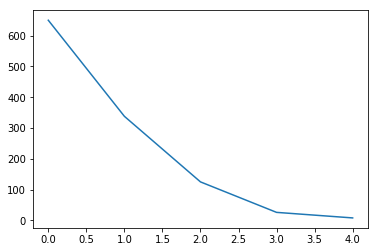

Percentage of gain: 0.14633990724733703
Total gain: 168.58357314893226
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 131]
 [171 241]]
0.5353846153846153
Percentile:  1
[[ 54  50]
 [ 90 144]]
0.5857988165680473
Percentile:  2
[[25 32]
 [25 43]]
0.544
Percentile:  3
[[9 9]
 [2 6]]
0.5769230769230769
Percentile:  4
[[4 4]
 [0 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4751357220412595
0.5360556038227628
F1,score 0.5195035460992908
G-score: 0.529105125977411
Window: 28
[[316 218]
 [324 293]]
Vol pos 1.1091302581740807
Vol neg 0.9923849102935338


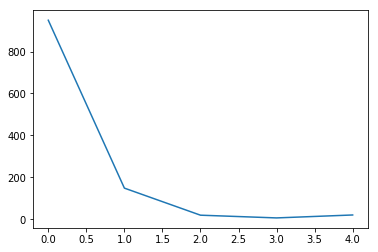

Percentage of gain: 0.11953753766196341
Total gain: 137.58770584891988
000000000000000000000000000000000000000000000000
Percentile:  0
[[267 174]
 [306 202]]
0.49420442571127504
Percentile:  1
[[27 21]
 [15 86]]
0.7583892617449665
Percentile:  2
[[10  6]
 [ 1  3]]
0.65
Percentile:  3
[[3 4]
 [0 0]]
0.42857142857142855
Percentile:  4
[[ 9 12]
 [ 0  0]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5562078712763644
0.577023498694517
F1,score 0.5952732644017725
G-score: 0.5230635335073978
Window: 28
[[198 288]
 [260 403]]
Vol pos 0.6484423525077997
Vol neg 0.7727788959266285


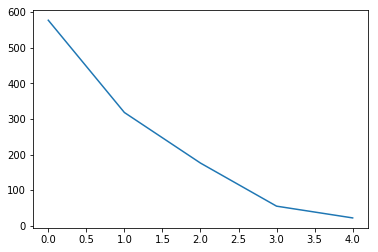

Percentage of gain: -0.029389887824721357
Total gain: -33.76898111060484
000000000000000000000000000000000000000000000000
Percentile:  0
[[117 149]
 [100 213]]
0.5699481865284974
Percentile:  1
[[ 46  85]
 [ 66 119]]
0.5221518987341772
Percentile:  2
[[27 47]
 [57 45]]
0.4090909090909091
Percentile:  3
[[ 6  7]
 [22 19]]
0.46296296296296297
Percentile:  4
[[ 2  0]
 [14  6]]
0.36363636363636365
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5057396577864414
0.5771230502599654
F1,score 0.5063492063492063
G-score: 0.4610051993067591
Window: 28
[[213 275]
 [347 319]]
Vol pos 1.0739165429546738
Vol neg 1.4066858937384885


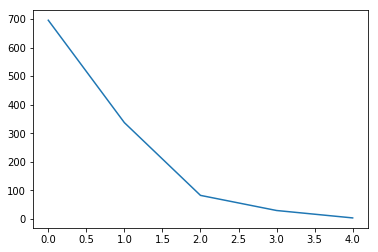

Percentage of gain: -0.263115273009925
Total gain: -303.63502505345343
000000000000000000000000000000000000000000000000
Percentile:  0
[[141 166]
 [178 211]]
0.5057471264367817
Percentile:  1
[[ 70  87]
 [104  76]]
0.4332344213649852
Percentile:  2
[[ 2 22]
 [38 20]]
0.2682926829268293
Percentile:  3
[[ 0  0]
 [22  7]]
0.2413793103448276
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  -14.503204038887475


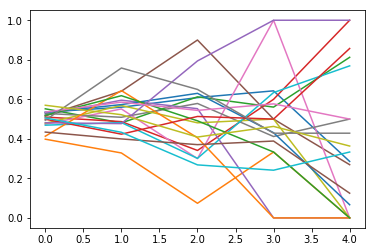

In [5]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg ,class_weight = {0:p ,1:1 })
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

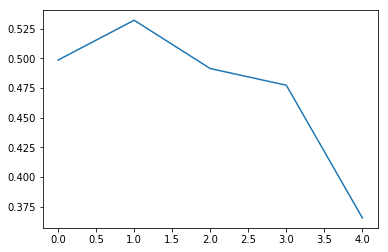

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.6515353805073432
G-score: 0.5380530973451327
Window: 140
[[120 386]
 [136 488]]
Vol pos 3.4354030627064787
Vol neg 2.8697573945910513


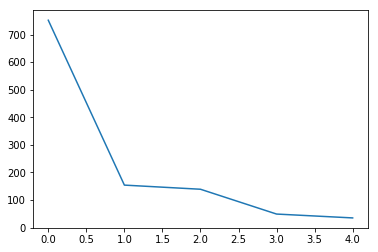

Percentage of gain: 0.5227537187159381
Total gain: 590.7117021490101
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 89 289]
 [ 74 301]]
0.5179282868525896
Percentile:  1
[[11 57]
 [ 9 75]]
0.5657894736842105
Percentile:  2
[[20 40]
 [26 53]]
0.5251798561151079
Percentile:  3
[[ 0  0]
 [24 25]]
0.5102040816326531
Percentile:  4
[[ 0  0]
 [ 3 32]]
0.9142857142857143
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.6755725190839694
G-score: 0.549469964664311
Window: 140
[[ 91 160]
 [350 531]]
Vol pos 2.4580960415545787
Vol neg 2.2468921002998785


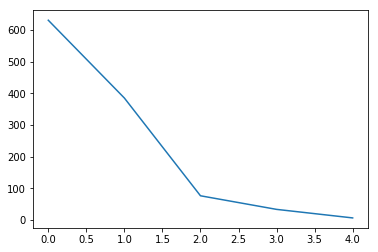

Percentage of gain: 0.33835756775089226
Total gain: 383.02076669401004
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 85 114]
 [195 236]]
0.5095238095238095
Percentile:  1
[[  4  32]
 [122 227]]
0.6
Percentile:  2
[[ 2 14]
 [13 47]]
0.6447368421052632
Percentile:  3
[[ 0  0]
 [18 15]]
0.45454545454545453
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.38186813186813184
G-score: 0.3087557603686636
Window: 140
[[ 62  29]
 [421 139]]
Vol pos 1.3290262485601667
Vol neg 2.4188835700226687


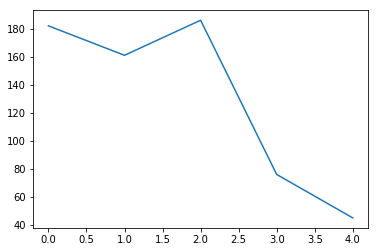

Percentage of gain: -1.2616948241929453
Total gain: -821.3633305496076
000000000000000000000000000000000000000000000000
Percentile:  0
[[43 29]
 [57 53]]
0.5274725274725275
Percentile:  1
[[19  0]
 [95 47]]
0.40993788819875776
Percentile:  2
[[  0   0]
 [156  30]]
0.16129032258064516
Percentile:  3
[[ 0  0]
 [72  4]]
0.05263157894736842
Percentile:  4
[[ 0  0]
 [40  5]]
0.1111111111111111
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.34303534303534305
G-score: 0.4407079646017699
Window: 140
[[333 122]
 [510 165]]
Vol pos 2.8092782158075664
Vol neg 3.070347683554225


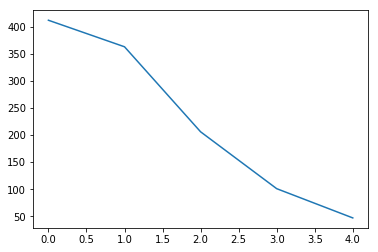

Percentage of gain: -0.4791497208266391
Total gain: -541.4391845341022
000000000000000000000000000000000000000000000000
Percentile:  0
[[179  53]
 [148  31]]
0.5109489051094891
Percentile:  1
[[ 79  32]
 [192  60]]
0.38292011019283745
Percentile:  2
[[68 29]
 [90 19]]
0.4223300970873786
Percentile:  3
[[ 6  8]
 [64 23]]
0.2871287128712871
Percentile:  4
[[ 0  0]
 [15 32]]
0.6808510638297872
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.4424192212096106
G-score: 0.4044247787610619
Window: 140
[[190 229]
 [444 267]]
Vol pos 1.3103609979559017
Vol neg 1.754887782223192


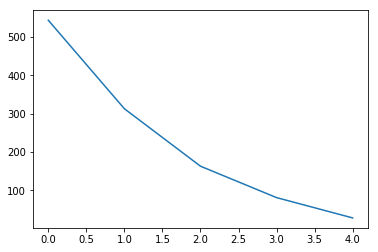

Percentage of gain: -0.515225222451647
Total gain: -582.2045013703612
000000000000000000000000000000000000000000000000
Percentile:  0
[[135 157]
 [120 132]]
0.49080882352941174
Percentile:  1
[[ 34  40]
 [147  92]]
0.402555910543131
Percentile:  2
[[  9  14]
 [118  22]]
0.1901840490797546
Percentile:  3
[[ 8 12]
 [49 12]]
0.24691358024691357
Percentile:  4
[[ 4  6]
 [10  8]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.8469973890339425
G-score: 0.741166077738516
Window: 140
[[ 28 235]
 [ 58 811]]
Vol pos 3.4376158717878957
Vol neg 2.0469709322487333


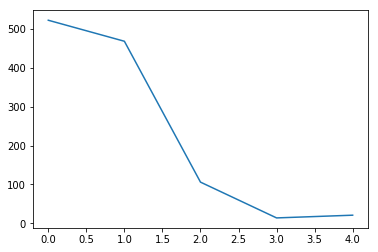

Percentage of gain: 2.0180187573155175
Total gain: 2284.397233281166
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 25 187]
 [ 22 288]]
0.5996168582375478
Percentile:  1
[[  1  36]
 [ 35 396]]
0.8482905982905983
Percentile:  2
[[ 2 11]
 [ 1 91]]
0.8857142857142857
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.4525080042689435
G-score: 0.5468197879858657
Window: 140
[[407  41]
 [472 212]]
Vol pos 2.5560866106128994
Vol neg 2.058030291236069


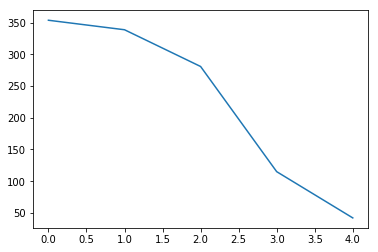

Percentage of gain: 0.46506013477498354
Total gain: 526.4480725652813
000000000000000000000000000000000000000000000000
Percentile:  0
[[102  14]
 [186  52]]
0.4350282485875706
Percentile:  1
[[108   6]
 [147  81]]
0.5526315789473685
Percentile:  2
[[118   9]
 [ 96  55]]
0.6223021582733813
Percentile:  3
[[55  8]
 [34 17]]
0.631578947368421
Percentile:  4
[[24  4]
 [ 8  6]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.6221264367816092
G-score: 0.5324444444444445
Window: 140
[[166 311]
 [215 433]]
Vol pos 1.8624732953695193
Vol neg 1.8178602894382168


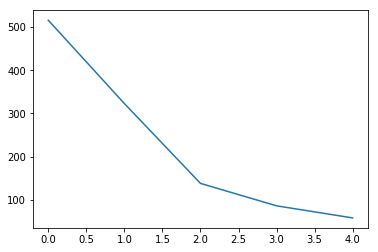

Percentage of gain: 0.1417128814949689
Total gain: 159.42699168184004
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 48 172]
 [ 89 207]]
0.4941860465116279
Percentile:  1
[[ 39  57]
 [ 76 151]]
0.5882352941176471
Percentile:  2
[[22 28]
 [28 60]]
0.5942028985507246
Percentile:  3
[[29 29]
 [15 13]]
0.4883720930232558
Percentile:  4
[[27 25]
 [ 6  0]]
0.46551724137931033
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5291005291005292
G-score: 0.5282685512367491
Window: 140
[[298 242]
 [292 300]]
Vol pos 2.912315656228165
Vol neg 2.7949388947424003


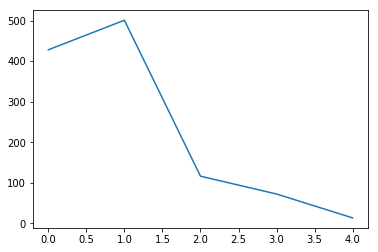

Percentage of gain: 0.2200241984381634
Total gain: 249.06739263200097
000000000000000000000000000000000000000000000000
Percentile:  0
[[122 105]
 [ 79 122]]
0.5700934579439252
Percentile:  1
[[104  93]
 [176 128]]
0.4630738522954092
Percentile:  2
[[20 22]
 [34 40]]
0.5172413793103449
Percentile:  3
[[38 22]
 [ 3  9]]
0.6527777777777778
Percentile:  4
[[13]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.6337792642140467
G-score: 0.6130742049469965
Window: 140
[[315 161]
 [277 379]]
Vol pos 3.42581499491509
Vol neg 4.314736765835502


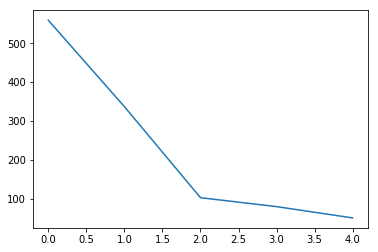

Percentage of gain: 0.4307958507377408
Total gain: 487.66090303512266
000000000000000000000000000000000000000000000000
Percentile:  0
[[215  98]
 [104 142]]
0.6386404293381037
Percentile:  1
[[ 78  39]
 [ 74 146]]
0.6646884272997032
Percentile:  2
[[19 12]
 [25 47]]
0.6407766990291263
Percentile:  3
[[ 3 12]
 [38 27]]
0.375
Percentile:  4
[[ 0  0]
 [35 16]]
0.3137254901960784
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.625170998632011
G-score: 0.5159010600706714
Window: 140
[[127 170]
 [378 457]]
Vol pos 4.648542851671307
Vol neg 4.004300124798043


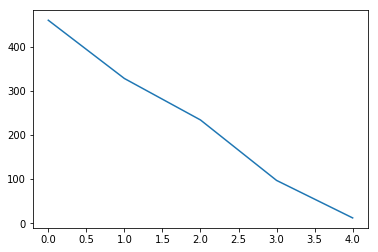

Percentage of gain: 0.45971073938755835
Total gain: 520.392556986716
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 65 105]
 [110 180]]
0.532608695652174
Percentile:  1
[[ 22  38]
 [158 110]]
0.4024390243902439
Percentile:  2
[[ 16  22]
 [ 88 107]]
0.5278969957081545
Percentile:  3
[[23  4]
 [22 48]]
0.7319587628865979
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7358184764991896
G-score: 0.5904522613065326
Window: 140
[[  8 123]
 [ 40 227]]
Vol pos 1.565602404656757
Vol neg 0.6265296715137343


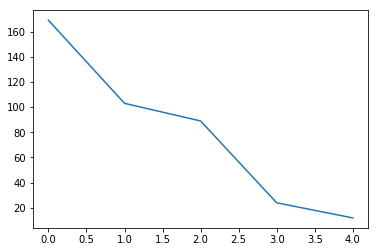

Percentage of gain: 0.6678196699437167
Total gain: 265.79222863759924
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 7 90]
 [28 47]]
0.313953488372093
Percentile:  1
[[ 0 26]
 [11 63]]
0.63
Percentile:  2
[[ 0  7]
 [ 0 82]]
0.9213483146067416
Percentile:  3
[[ 0  0]
 [ 1 22]]
0.9565217391304348
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.1946902654867257
G-score: 0.2745792736935341
Window: 140
[[211 177]
 [642  99]]
Vol pos 1.7997174268844458
Vol neg 2.9075966293021422


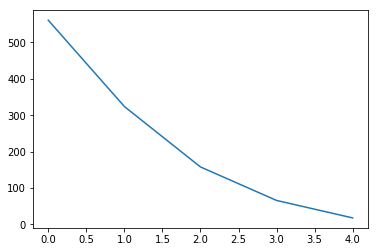

Percentage of gain: -1.6150657547070648
Total gain: -1823.409237064276
000000000000000000000000000000000000000000000000
Percentile:  0
[[158 119]
 [220  64]]
0.39572192513368987
Percentile:  1
[[ 18  45]
 [226  35]]
0.16358024691358025
Percentile:  2
[[ 13  12]
 [133   0]]
0.08227848101265822
Percentile:  3
[[22  1]
 [43  0]]
0.3333333333333333
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.6885026737967914
G-score: 0.585040071237756
Window: 140
[[142 178]
 [288 515]]
Vol pos 2.1082071879676336
Vol neg 1.6817543628263434


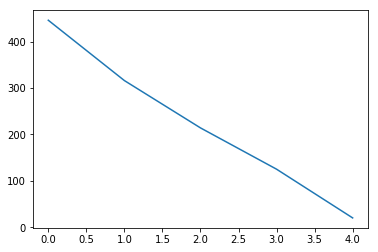

Percentage of gain: 0.5355250128385212
Total gain: 601.3945894176593
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 47 118]
 [107 174]]
0.49551569506726456
Percentile:  1
[[ 18  37]
 [ 91 170]]
0.5949367088607594
Percentile:  2
[[ 22   4]
 [ 51 137]]
0.7429906542056075
Percentile:  3
[[40 16]
 [36 33]]
0.584
Percentile:  4
[[14  3]
 [ 3  0]]
0.7
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.7706422018348624
G-score: 0.6684350132625995
Window: 140
[[126 242]
 [133 630]]
Vol pos 2.742363685526679
Vol neg 1.9988612178747673


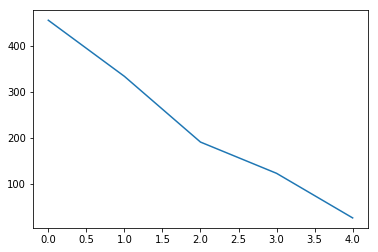

Percentage of gain: 1.1703395133113454
Total gain: 1323.6539895551316
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 75 133]
 [ 39 208]]
0.621978021978022
Percentile:  1
[[ 33  96]
 [ 39 166]]
0.5958083832335329
Percentile:  2
[[  7   7]
 [ 47 131]]
0.71875
Percentile:  3
[[  6   4]
 [  8 104]]
0.9016393442622951
Percentile:  4
[[ 5  2]
 [ 0 19]]
0.9230769230769231
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.26528258362168394
G-score: 0.43478260869565216
Window: 140
[[375  31]
 [606 115]]
Vol pos 2.89713924117255
Vol neg 3.4363813398260743


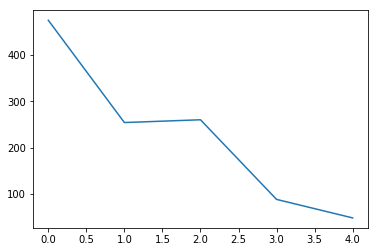

Percentage of gain: -0.6826767393918897
Total gain: -769.3766852946596
000000000000000000000000000000000000000000000000
Percentile:  0
[[192   9]
 [234  40]]
0.4884210526315789
Percentile:  1
[[ 99   5]
 [100  50]]
0.5866141732283464
Percentile:  2
[[ 22  16]
 [197  25]]
0.18076923076923077
Percentile:  3
[[24  1]
 [63  0]]
0.2727272727272727
Percentile:  4
[[37  0]
 [11  0]]
0.7708333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5524625267665954
G-score: 0.4446412754650133
Window: 140
[[115 203]
 [424 387]]
Vol pos 2.63235648642374
Vol neg 3.132098429349915


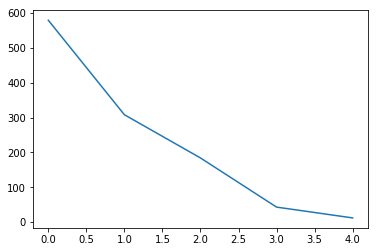

Percentage of gain: -0.5689838432397512
Total gain: -642.3827590176791
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 60  74]
 [227 218]]
0.48013816925734026
Percentile:  1
[[ 17  34]
 [135 122]]
0.4512987012987013
Percentile:  2
[[36 84]
 [35 29]]
0.3532608695652174
Percentile:  3
[[ 2 11]
 [22  8]]
0.23255813953488372
Percentile:  4
[[0 0]
 [4 8]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6523297491039427
G-score: 0.48404255319148937
Window: 140
[[  0 582]
 [  0 546]]
Vol pos 2.7088670536411916
Vol neg 3.7360956734190243


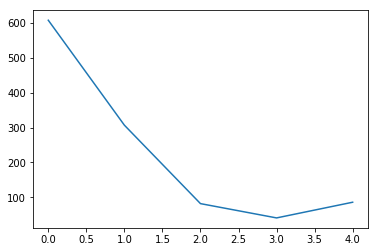

Percentage of gain: -0.6164594597888134
Total gain: -695.3662706417815
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 339]
 [  0 269]]
0.44243421052631576
Percentile:  1
[[  0 103]
 [  0 204]]
0.6644951140065146
Percentile:  2
[[ 0 12]
 [ 0 70]]
0.8536585365853658
Percentile:  3
[[ 0 41]
 [ 0  0]]
0.0
Percentile:  4
[[ 0 86]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.5597069597069596
G-score: 0.46672582076308783
Window: 140
[[144 241]
 [360 382]]
Vol pos 1.399390348121523
Vol neg 1.3775148023356776


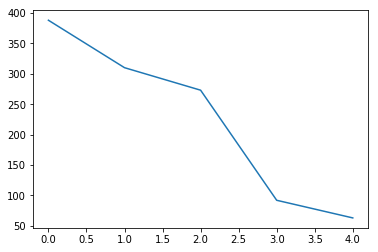

Percentage of gain: -0.08146146680729474
Total gain: -91.80707309182117
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 116]
 [ 99  88]]
0.4444444444444444
Percentile:  1
[[ 39  65]
 [ 89 117]]
0.5032258064516129
Percentile:  2
[[ 20  48]
 [101 104]]
0.4542124542124542
Percentile:  3
[[ 0 12]
 [38 42]]
0.45652173913043476
Percentile:  4
[[ 0  0]
 [32 31]]
0.49206349206349204
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.8138437336130047
G-score: 0.6861184792219275
Window: 140
[[  0 355]
 [  0 776]]
Vol pos 3.4216687201056897
Vol neg 3.1989983067635728


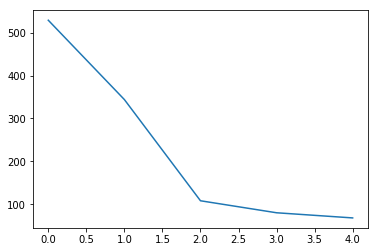

Percentage of gain: 1.3435636851467259
Total gain: 1519.570527900947
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 230]
 [  0 299]]
0.5652173913043478
Percentile:  1
[[  0  48]
 [  0 296]]
0.8604651162790697
Percentile:  2
[[ 0 18]
 [ 0 90]]
0.8333333333333334
Percentile:  3
[[ 0 12]
 [ 0 68]]
0.85
Percentile:  4
[[ 0 46]
 [ 0 22]]
0.3235294117647059
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  147.20939564860976


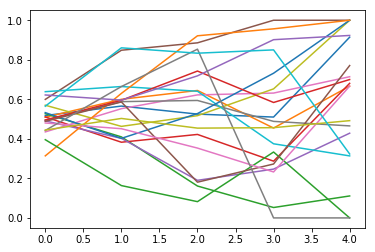

In [7]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg ,class_weight = {0:p ,1:1 })
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

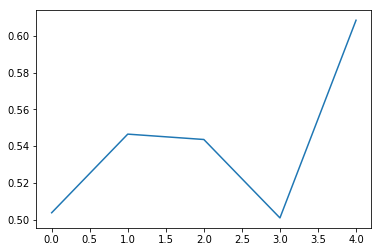

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg,class_weight = {0:p ,1:1 } )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

SyntaxError: invalid syntax (<ipython-input-9-a644249ebb59>, line 155)

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()